This notebook makes plots that do not involve simulating the equations in time, ie. those related to the function itself. The figures are:

1. The survival function for different values of aggregation and the threshold
2. A figure showing how many roots are possible between 1-F and m/c
3. Comparison between the full function and the Hill function approximation by minimizing norm

In [1]:
# Setup
import analysisfunctions as af
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'

# Fixed parameters
# Beetle productivity
c = 500
# Fixed values of k and phi
k=10;p=200;
# m range
mr = np.linspace(0,c,num=1000)

# Colors
c1 = '#00485C' # This is the official dark blue
c2 = '#0084A8' # Official light blue
c3 = '#986532' # Official "yellow", which is more dark brown.
cg = '0.4' # Grey
# Other options:
#'#F2E2CA' # Pale straw yellow 
#'#986532' # Darker brown
# And generate an array of lightness values, from 5% to 95% lightness including the official one which is 18%.
# 20 colors, and index 16 is the initial one
# Useful link: https://www.w3schools.com/colors/colors_picker.asp
c_arr = [ '#e6f9ff','#ccf4ff','#b3eeff','#99e9ff','#80e3ff','#66deff','#4dd8ff','#33d3ff','#1acdff','#00c8ff',
          '#00b4e6','#00a0cc','#008cb3','#007899','#006480','#005066','#00485c','#003c4d','#002833','#00141a']

# 1. Survival function for different parameters

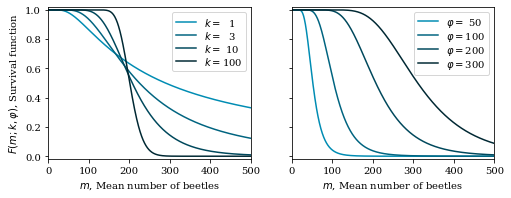

In [2]:
# Two plot option:
# k range to plot over and colors
kr = [1,3,10,100]
ck = [c_arr[12],c_arr[14],c_arr[16],c_arr[18]]
# phi range to plot over and colors
pr = [50,100,200,300]
cp = ['#d29a46','#b9812d','#906423','#674819'] # This is optional. I think I prefer saving for Hill approx.

fig,axs = plt.subplots(1,2,figsize=(8,3),sharey=True)

for kk,cc in zip(kr,ck):
    axs[0].plot(mr,af.ffull(mr,kk,p),label=r'$k=${:3.0f}'.format(kk),c=cc,ls='-')
for pp,cc in zip(pr,ck):
    axs[1].plot(mr,af.ffull(mr,k,pp),label=r'$\varphi=${:3.0f}'.format(pp),c=cc,ls='-')


axs[0].set_ylabel(r'$F(m;k,\varphi)$, Survival function')
for ax in axs:
    ax.set_box_aspect(0.75)
    ax.legend(labelspacing=0.1)
    ax.set_xlabel('$m$, Mean number of beetles')
    ax.set_xlim(0,c)
    ax.set_ylim(-0.02,1.02)
    
fig.savefig('figures/ffull.pdf',bbox_inches = 'tight')

# 2. Number of possible roots

In [3]:
# Solve for the point of one intersection in all three variables. Do this by setting f and df to zero.
keq_sol = opt.root(lambda x: af.fdf_eq(x[0],c,x[1],p),x0=[300,2])
peq_sol = opt.root(lambda x: af.fdf_eq(x[0],c,k,x[1]),x0=[300,300])
ceq_sol = opt.root(lambda x: af.fdf_eq(x[0],x[1],k,p),x0=[300,400])
mkeq,keq = keq_sol.x
mpeq,peq = peq_sol.x
mceq,ceq = ceq_sol.x

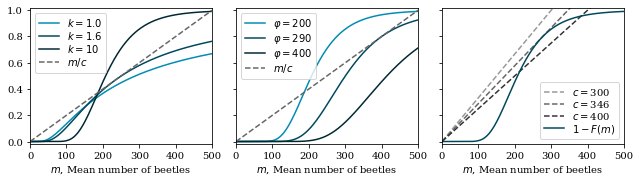

In [4]:
fig,axs = plt.subplots(1,3,figsize=(9.,2.8),sharey=True,tight_layout=True)

kr_root = [1,keq,k]
ck_root = [c_arr[12],c_arr[16],c_arr[18]]
pr_root = [200,peq,400]
cp_root = ['#b9812d','#906423','#674819']
cr_root = [300,ceq,400]
cc_root = ['0.6',cg,'0.2']

# First plot vary k
for kk,cc in zip(kr_root,ck_root):
    # Print a decimal place if <10
    if kk<10:
        axs[0].plot(mr,1-af.ffull(mr,kk,p),label=r'$k={:2.1f}$'.format(kk),c=cc,ls='-')
    else:
        axs[0].plot(mr,1-af.ffull(mr,kk,p),label=r'$k={:2.0f}$'.format(kk),c=cc,ls='-')
axs[0].plot(mr,mr/c,'--',label=r'$m/c$',c=cg)
# Second plot vary phi
for pp,cc in zip(pr_root,ck_root):
    axs[1].plot(mr,1-af.ffull(mr,k,pp),label=r'$\varphi={:5.0f}$'.format(pp),c=cc,ls='-')
axs[1].plot(mr,mr/c,'--',label=r'$m/c$',c=cg)
# Third plot vary c
for cc,cmc in zip(cr_root,cc_root):
    axs[2].plot(mr,mr/cc,label=r'$c=${:3.0f}'.format(cc),c=cmc,ls='--')
axs[2].plot(mr,1-af.ffull(mr,kk,p),label=r'$1-F(m)$',c=c1,ls='-')

for ax in axs:
    ax.set_box_aspect(0.75)
    ax.legend(labelspacing=0.1)
    ax.set_xlabel('$m$, Mean number of beetles')
    ax.set_xlim(0,c)
    ax.set_ylim(-0.02,1.02)

fig.savefig('figures/roots.pdf',bbox_inches = 'tight')

# 3. Comparison of full and Hill function obtained by minimizing norm

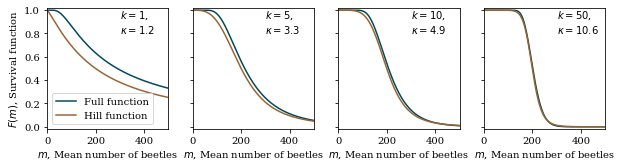

In [12]:
# ks to fix
kr_comp = [1,5,10,50]

# Get corresponding ns (ie. Hill aggregation parameter)
# NOTE: We denote these as n here, but in the text n is kappa, as in the annotations in the below plot.
nr_comp = []
for kk in kr_comp:
    ntemp = af.get_hill_n(kk,p,c)
    nr_comp.append(ntemp)

# Now plot. The size has to be changed if the size of k is changed
# Get range of m
mr = np.linspace(0,c,num=1000)
fig,axs = plt.subplots(1,4,figsize=(10,2.5),sharey=True)#,tight_layout=True)
for ax,kk,nn in zip(axs.flatten(),kr_comp,nr_comp):
    ax.plot(mr,af.ffull(mr,kk,p),label='Full function',c=c1)
    ax.plot(mr,af.fhill(mr,nn,p),label='Hill function',c=c3)
    ax.set_ylim(-0.02,1.02)
    ax.set_xlim(0,c)
    ax.set_xlabel(r'$m$, Mean number of beetles')
    ax.annotate(r'$k = {:.0f}$,' '\n' '$\kappa = {:.1f}$'.format(kk,nn),(0.6,0.79),xycoords='axes fraction')
    ax.set_box_aspect(1)
#    ax.set_title('k = {:.0f}, n = {:.1f}'.format(kk,nn))
# Other axes things
axs[0].set_ylabel(r'$F(m)$, Survival function')
axs[0].legend(loc='lower left')

fig.savefig('figures/hill_comparison.pdf',bbox_inches='tight')

# Old version of first plot

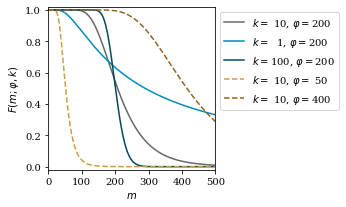

In [8]:
# k range to plot over and colors
kr = [1,100]
ck = [c_arr[12],c_arr[16]]
# phi range to plot over and colors
pr = [50,400]
cp = ['#d29a46','#906423']

fig,ax = plt.subplots(figsize=(3,3))

# Plot fixed value first
ax.plot(mr,af.ffull(mr,k,p),label=r'$k=${:3.0f}, $\varphi=${:3.0f}'.format(k,p),c=cg,ls='-')

for kk,cc in zip(kr,ck):
    ax.plot(mr,af.ffull(mr,kk,p),label=r'$k=${:3.0f}, $\varphi=${:3.0f}'.format(kk,p),c=cc,ls='-')
for pp,cc in zip(pr,cp):
    ax.plot(mr,af.ffull(mr,k,pp),label=r'$k=${:3.0f}, $\varphi=${:3.0f}'.format(k,pp),c=cc,ls='--')

ax.legend(loc='best',bbox_to_anchor=(1.0,1.0))
ax.set_xlabel('$m$')
ax.set_xlim(0,c)
ax.set_ylim(-0.02,1.02)
ax.set_ylabel(r'$F(m;\varphi,k)$')

fig.savefig('figures/ffull1.pdf',bbox_inches = 'tight')